<a href="https://colab.research.google.com/github/kellischeuble/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/KS_DS12_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# function to find mean
def mean_func(list):
  return sum(list) / len(list)

# function to find variance
def variance(list):
  summed_squared = 0
  # find mean by invoking mean function from above
  mean_list = mean_func(list)
  
  # find summed squared distance from mean
  for x in list:
    summed_squared += ((x - mean_list) * (x - mean_list))
  
  # return the variance (summed squared distance divided by 
  # population -1)
  return summed_squared / (len(list)-1)

# i'm guessing importing math is allowed
from math import sqrt

# function to find standard deviation
def standard_deviation(list):
  return sqrt(variance(list))

mean_sales = mean_func(sales)
var_sales = variance(sales)
std_sales = standard_deviation(sales)

print('mean of sales:', mean_sales)
print('variance of sales:', var_sales)
print('standard deviation of sales:', std_sales)


mean of sales: 3052.714285714286
variance of sales: 214387.90476190473
standard deviation of sales: 463.0204150595357


In [0]:
# check work using pandas
import pandas as pd

# convert python list holding sales into a pandas series
sales = pd.Series(sales)

# compare answers with pandas to answers from above
print('mean using pandas is equal to mean calculated from scratch:')
print(sales.mean() == mean_sales)
print()
print('variance using pandas is equal to mean calculated from scratch:')
print(sales.var() == var_sales)
print()
print('stdev using pandas is equal to mean calculated from scratch:')
print(sales.std() == std_sales)



mean using pandas is equal to mean calculated from scratch:
True

variance using pandas is equal to mean calculated from scratch:
True

stdev using pandas is equal to mean calculated from scratch:
True


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

# sales is currently of type pd.Series... customers is of type python list
print(sales)
print(customers)


0    3505
1    2400
2    3027
3    2798
4    3700
5    3250
6    2689
dtype: int64
[127, 80, 105, 92, 120, 115, 93]


In [0]:
# let's see if I can make a data frame out of these two different data types

data = {'sales': sales, 'customers': customers}

df = pd.DataFrame(data)
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
# looks like it doesn't have a problem.
# find variance-covariance matrix

df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [0]:
# that's the variance-covariance matrix, but we can also find it with
# .cov() function
# so here is where I run into the problem with them both not being
# pd.Series datatypes.
# customers must also be a pandas series

sales.cov(customers)

TypeError: ignored

In [0]:
# use .cov() function and cast customers as a pandas series
# matches what we would expect by looking at variance-covariance
# matrix from above
customers = pd.Series(customers)
covariance = sales.cov(customers)
print('covariance between customers and sales:', covariance)

covariance between customers and sales: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# call function from above to calculate stdev of customers

std_customers = standard_deviation(customers)
print('standard deviation of customers:', std_customers)

# correlation coefficient is the covariance / both standard deviations

standard deviation of customers: 17.057326313123664


In [0]:
# check to see if it is correct using pandas
print('standard deviation of customers calcualted in pandas:', customers.std())

standard deviation of customers calcualted in pandas: 17.057326313123664


In [0]:
# function to calculate correlation
def correlation(var1,var2):
  covariance = var1.cov(var2)
  return covariance / (standard_deviation(var1) * standard_deviation(var2))

print('correlation between sales and customers:', correlation(sales, customers))

# that's almost a completely positive linear correlation

correlation between sales and customers: 0.9628339778148909


In [0]:
# check with pandas
# that matches up!
# variables always have a perfect correlation with themselves
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# look at numeric column
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
# variance-covariance matrix
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-0.5, 3.2)

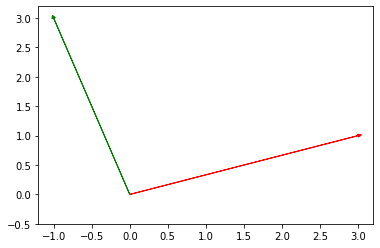

In [0]:
# synonym = perpendicular to each other / at a right angle to one another

import matplotlib.pyplot as plt

vector_1 = [3, 1]
vector_2 = [-1, 3]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green');
plt.xlim(-1.2,3.2)
plt.ylim(-.5,3.2)

In [0]:
# check to see if they are orthogonal by taking the dot product.. if it equals 
# zero, the two dot products are orthagonal 

import numpy as np

np.dot(vector_1,vector_2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# check by taking the dot product

a = np.array([-5,3,7])
b = np.array([6,-8,2])
dot_a_b = np.dot(a,b)
string = 'the two vectors are {}. The dot product between them is {}'

if dot_a_b == 0:
  print(string.format('orthagonal', dot_a_b))
else:
  print(string.format('not orthagonal', dot_a_b))

the two vectors are not orthagonal. The dot product between them is -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

# norm squared
norm_c = np.linalg.norm(c) 
print('norm squared =', norm_c * norm_c)

# dot product
print('dot product of c,c =', np.dot(c, c))

# c^Tc
print('c^T c =', np.matmul(c.T,c))

# they all have the same values
# the first is the squared value of the norm squared,
# which is the length of the vector squared. the dot product 
# is the vector c transposed and scaled on itself, which i guess
# would double the length. The transposed vector of c still has
# the same elements and number of elements, so multiplying the 
# inverse of c by c would also result in the same value

norm squared = 665.0
dot product of c,c = 665
c^T c = 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
\vec{c} = \begin{bmatrix} 7 \\ 12 \end{bmatrix} 
= 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix}
 +  12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
 = 7 \hat{i} + 12 \hat{j}
\end{align}

\begin{align}
\vec{e} = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} 
= 2 \begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix}
+  11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}
+  -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
 = 2 \hat{i} + 11 \hat{j} + -8 \hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# divide vector by the norm to get the unit vector
f = np.array([4,12,11,9,2])

f_norm = np.linalg.norm(f)

unit_f = (f/f_norm) 
print('unit vector of f:', unit_f)

unit vector of f: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

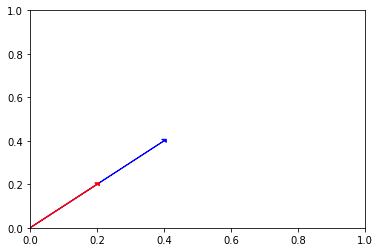

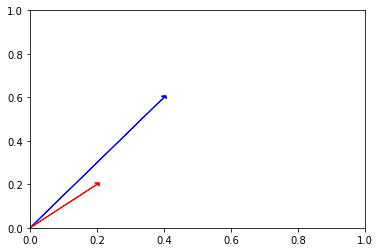

In [0]:
import matplotlib.pyplot as plt

# linearly dependent vectors

plt.arrow(0,0,.4,.4, head_width=.02, head_length=.01, color='b')
plt.arrow(0,0,.2, .2, head_width=.02, head_length=.01, color='r')
plt.show();

# linearly independent vectors

plt.arrow(0,0,.4,.6, head_width=.02, head_length=.01, color='b')
plt.arrow(0,0,.2, .2, head_width=.02, head_length=.01, color='r')
plt.show();


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

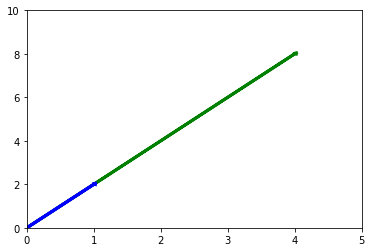

In [0]:
# the two vectors span one dimensional space because they are linearly dependent
# one of the vectors is redundant

plt.xlim(0,5)          
plt.ylim(0,10)

plt.arrow(0, 0, 4, 8, linewidth=3, head_width=.05, head_length=0.05, 
          color ='green')
plt.arrow(0, 0, 1, 2, linewidth=3, head_width=.05, head_length=0.05, 
          color ='blue');

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# put vectors into a matrix to see what the rank is... that will translate into 
# the span

o = np.array([[1,2,3],
            [-1,0,7],
            [4,8,2]])

np.linalg.matrix_rank(o)

# the rank of this matrix is 3, therefore this set of vectors spans 3 dimensional
# space

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



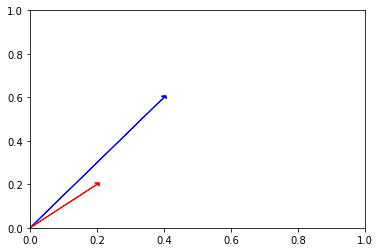

In [0]:
# any two vectors that are linearly independent form a basis for R^2.
# graph the same vectors as above

plt.arrow(0,0,.4,.6, head_width=.02, head_length=.01, color='b')
plt.arrow(0,0,.2, .2, head_width=.02, head_length=.01, color='r')
plt.show();

## 6.2 What does it mean to form a basis?

The vectors can be scaled and combined to form any vector on that plane.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# I calculated this above. These are the same exact vectors. The rank is 3.

## 7.2 What does the rank of a matrix tell us?

The rank tells us how many linearly independent vectors there are in the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

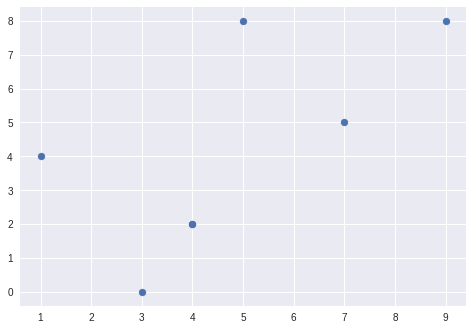

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()